



<div class="row">
  <div class="column">
    <img src="../img/Atr_logo.png" width="250">
  </div>
</div>





# TPAD model 




In [2]:
import numpy as np
import pandas as pd
import os.path as pth
import matplotlib.pyplot as plt
from fastoad.io import VariableIO
import sys
sys.path.append('C:\\Users\\LA202059\\Desktop\\RHEA')
import fastoad.utils.postprocessing.analysis_and_plots as analysis_and_plots
from rhea.utils.postprocessing.analysis_and_plots_RHEA import wing_geometry_plot, \
drag_polar_plot, mass_breakdown_sun_plot,mass_breakdown_bar_plot, aircraft_geometry_plot,payload_range_plot,plot_double,drag_breakdown_sun_plot,drag_breakdown_bar_plot,loading_diagram_plot
from scipy import constants
from fastoad.utils.physics import Atmosphere
from fastoad.utils.postprocessing import VariableViewer


Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


Import RHEA output file of ATR72 model 

In [20]:
DATA_FOLDER_PATH = 'data'
WORK_FOLDER_PATH = '../workdir'



ref_folder='TPAD_baseline_ref_ML_L1'
RESULTS_FOLDER_PATH =WORK_FOLDER_PATH+'/'+ref_folder+'/sizing'
RESULTS_DOC_FOLDER_PATH =WORK_FOLDER_PATH+'/'+ref_folder+'/DOC/200NM_maxcrdiv_FL100_Thrust_rate_descent=0.1_at_MTOW'
RESULT_DOC_FILE = pth.join(RESULTS_DOC_FOLDER_PATH,'problem_outputs.xml' )
RESULT_FILE = pth.join(RESULTS_FOLDER_PATH,'problem_outputs.xml' )

## 3. Mass breakdown

In [10]:
fig = mass_breakdown_sun_plot(RESULT_FILE)
fig.show()

## 5. Mission performance



3493.663476806579

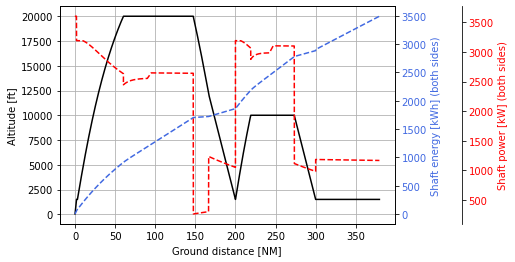

In [21]:
vv = VariableViewer()

flight_data = pd.read_csv(pth.join(RESULTS_DOC_FOLDER_PATH,'DOC_flight_points.csv'))
#flight_data = flight_data_full[(flight_data_full.name=='climb') | (flight_data_full.name=='cruise') | (flight_data_full.name=='acceleration descent')| (flight_data_full.name=='descent')]
delta_energy = flight_data.TPshaft_power *flight_data.delta_time/3600
flight_data['energy']= delta_energy.cumsum() 

fig, ax1 = plt.subplots()
plt.grid()

ax1.set_xlabel('Ground distance [NM]')
ax1.set_ylabel('Altitude [ft]', color='black')
ax1.plot(flight_data.ground_distance/constants.nautical_mile, flight_data.altitude/constants.foot ,'-',color='black')#,label='Altitude')
#ax1.plot(df[df.FL==20000].RTO, 785.9*np.ones(len(df[df.FL==20000].RTO.values)) ,'_-',color='red',label='ATR72_baseline')

ax3=ax1.twinx()
ax3.spines['right'].set_position(("axes", 1.2))
ax3.tick_params(axis='y', labelcolor='red')
ax3.set_ylabel('Shaft power [kW] (both sides)', color='red')
ax3.plot(flight_data.ground_distance/constants.nautical_mile, flight_data.TPshaft_power/1000  ,'--',color='red')#,label='FL180')


ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel('Shaft energy [kWh] (both sides)', color='royalblue')
ax2.plot(flight_data.ground_distance/constants.nautical_mile, flight_data.energy.values/1000 ,'--',color='royalblue')#,label='FL180')
#ax2.legend(loc='upper right')

flight_data.energy.values[-1]/1000

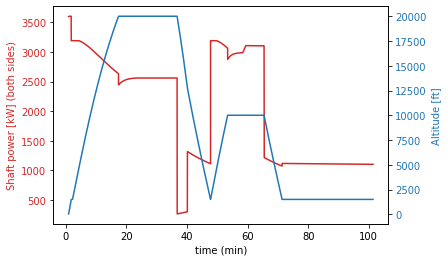

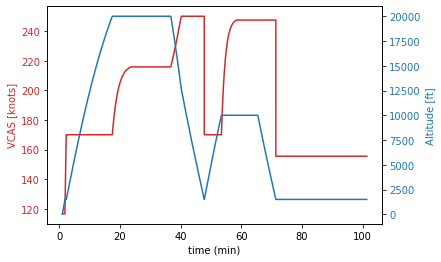

Block fuel for 200.0 nm IC is 609.4 kg
Trip time 45.53 min and block time 58.53 min
TTC to  20000 ft 15.17 min
Fuel climb 230.8 kg
Specific range at 20000 ft @ 22267 TOW is 0.404 nm/kg @ 0.481 mach 296 kt
Cruise fuel consumption 231.31 kg cruise distance 93.48 nm
Fuel consumption in descent from 20000 ft at 250.0  knots is  78.1 kg
Descent time 11.0 min


In [5]:
vv = VariableViewer()



#flight_data = pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'flight_points.csv' ))
#vv.load(RESULT_FILE)
flight_data = pd.read_csv(pth.join(RESULTS_DOC_FOLDER_PATH,'DOC_flight_points_smoothed.csv' ))
vv.load(RESULT_DOC_FILE)
plot_double(flight_data.time/60,flight_data.TPshaft_power/1000,flight_data.altitude/constants.foot,'time (min)','Shaft power [kW] (both sides)','Altitude [ft]')
plot_double(flight_data.time/60,flight_data.equivalent_airspeed.values/constants.knot,flight_data.altitude/constants.foot,'time (min)','VCAS [knots]','Altitude [ft]')

results=vv.get_variables()
TOW=results["data:mission:DOC:TOW"].value
BF_RHEA=results["data:mission:DOC:block_fuel"].value
range_RHEA=results["data:mission:DOC:range"].value
#TOW=results["data:weight:aircraft:MTOW"].value
#BF_RHEA=results["data:mission:sizing:block_fuel"].value
#range_RHEA=results["data:TLAR:range"].value

print('Block fuel for',range_RHEA/constants.nautical_mile,'nm','IC is',round(BF_RHEA,1), 'kg')
End_of_in_climb_time = flight_data[flight_data.name=='initial climb'].time.values[-1]
End_of_descent_time = flight_data[flight_data.name=='descent'].time.values[-1]
Trip_time=(End_of_descent_time-End_of_in_climb_time)/60
Block_time = round(Trip_time,3) + (6+1+2+4)
print('Trip time', round(Trip_time,2), 'min', 'and block time',round(Block_time,2) , 'min')
############# Climb RESULTS ##########
FL=flight_data.altitude.max()
flight_data_in_climb = flight_data[flight_data.name=='initial climb']
flight_data_climb = flight_data[flight_data.name=='climb']
#remove the points of climb that are actually cruise (acceleration to cruise mach)
flight_data_climb = flight_data_climb[flight_data_climb.time<=flight_data.loc[flight_data['altitude']==FL, ['time']].values[0][0]]
TTC=flight_data_climb.time.values[-1]-flight_data_in_climb.time.values[-1]
print('TTC to ',round(FL/constants.foot),'ft' ,round(TTC/60,2), 'min')
Fuel_climb= flight_data_climb[flight_data_climb.name=='climb'].fuel_mass.values[-1]-flight_data_in_climb.fuel_mass.values[-1]
print('Fuel climb',round(Fuel_climb,2),'kg')
############# Cruise RESULTS ##########
flight_data_cruise=flight_data[flight_data.altitude==FL]
max_mach_rhea=flight_data_cruise.mach.values[-1]
cruise_fuel=(flight_data_cruise.fuel_mass.values[-1]-flight_data_climb.fuel_mass.values[-1])
cruise_distance=(flight_data_cruise.ground_distance.values[-1]-flight_data_climb.ground_distance.values[-1])
max_SR_rhea = cruise_distance/constants.nautical_mile/cruise_fuel
print('Specific range at',round(FL/constants.foot),'ft','@',round(TOW),'TOW', 'is',round(max_SR_rhea,3),'nm/kg','@',round(max_mach_rhea,3),'mach',round(flight_data_cruise.true_airspeed.values[-1]/constants.knot),'kt')
print('Cruise fuel consumption',round(cruise_fuel,2),'kg','cruise distance',round(cruise_distance/constants.nautical_mile,2),'nm')

############# Descent RESULTS ##########
flight_data_descent = flight_data[(flight_data['name']=='descent') | (flight_data['name']=='acceleration descent')]
descent_speed=flight_data_descent.equivalent_airspeed.values[-2]/constants.knot
descent_fuel=flight_data_descent.fuel_mass.values[-2]-flight_data_cruise.fuel_mass.values[-1]
print('Fuel consumption in descent from',round(FL/constants.foot),'ft', 'at',round(descent_speed,0),' knots is ',round(descent_fuel,2),'kg')
ff=flight_data_descent.psfc.values[:-1] * flight_data_descent.TPshaft_power.values[:-1]/2 #kg/s
descent_time = flight_data_descent.time.values[-1]/60-flight_data_cruise.time.values[-1]/60
print('Descent time',round(descent_time,1),'min')


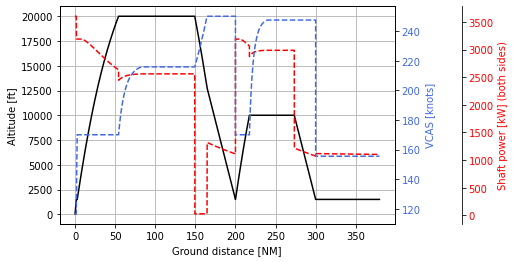

In [38]:

fig, ax1 = plt.subplots()
plt.grid()

ax1.set_xlabel('Ground distance [NM]')
ax1.set_ylabel('Altitude [ft]', color='black')
ax1.plot(flight_data.ground_distance/constants.nautical_mile, flight_data.altitude/constants.foot ,'-',color='black')#,label='Altitude')
#ax1.plot(df[df.FL==20000].RTO, 785.9*np.ones(len(df[df.FL==20000].RTO.values)) ,'_-',color='red',label='ATR72_baseline')

ax3=ax1.twinx()
ax3.spines['right'].set_position(("axes", 1.2))
ax3.tick_params(axis='y', labelcolor='red')
ax3.set_ylabel('Shaft power [kW] (both sides)', color='red')
ax3.plot(flight_data.ground_distance/constants.nautical_mile, flight_data.TPshaft_power/1000  ,'--',color='red')#,label='FL180')


ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel('VCAS [knots]', color='royalblue')
ax2.plot(flight_data.ground_distance/constants.nautical_mile, flight_data.equivalent_airspeed.values/constants.knot ,'--',color='royalblue')#,label='FL180')
#ax2.legend(loc='upper right')



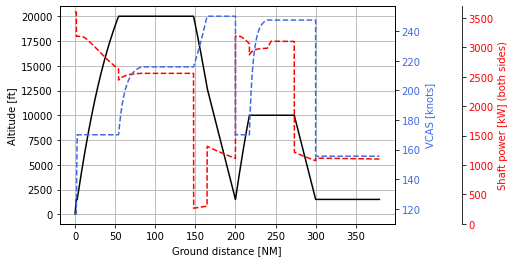

In [14]:

fig, ax1 = plt.subplots()
plt.grid()

ax1.set_xlabel('Ground distance [NM]')
ax1.set_ylabel('Altitude [ft]', color='black')
ax1.plot(flight_data.ground_distance/constants.nautical_mile, flight_data.altitude/constants.foot ,'-',color='black')#,label='Altitude')
#ax1.plot(df[df.FL==20000].RTO, 785.9*np.ones(len(df[df.FL==20000].RTO.values)) ,'_-',color='red',label='ATR72_baseline')

ax3=ax1.twinx()
ax3.spines['right'].set_position(("axes", 1.2))
ax3.tick_params(axis='y', labelcolor='red')
ax3.set_ylabel('Shaft power [kW] (both sides)', color='red')
ax3.set_ylim(0,3700)

ax3.plot(flight_data.ground_distance/constants.nautical_mile, flight_data.TPshaft_power/1000  ,'--',color='red')#,label='FL180')


ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel('VCAS [knots]', color='royalblue')
ax2.plot(flight_data.ground_distance/constants.nautical_mile, flight_data.equivalent_airspeed.values/constants.knot ,'--',color='royalblue')#,label='FL180')
#ax2.legend(loc='upper right')



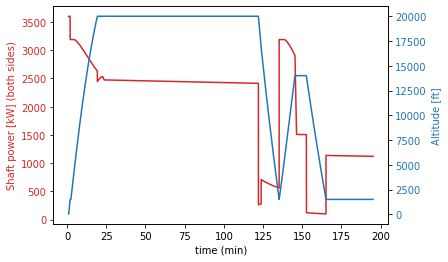

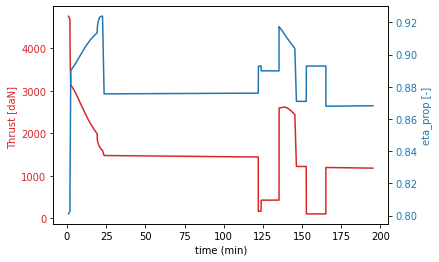

In [8]:
#☻flight_data= pd.read_csv(pth.join(RESULTS_DOC_FOLDER_PATH,'DOC_flight_points.csv' ))
flight_data= pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'flight_points.csv' ))

plot_double(flight_data.time/60,flight_data.TPshaft_power/1000,flight_data.altitude/constants.foot,'time (min)','Shaft power [kW] (both sides)','Altitude [ft]')
eta_prop=  (flight_data.thrust)*flight_data.true_airspeed/(flight_data.TPshaft_power*0.99)
plot_double(flight_data.time/60,flight_data.thrust/10,eta_prop,'time (min)','Thrust [daN] ','eta_prop [-]')


### 1. Take off

TOFL 1384 m
TODn-1 1384 m V_1 58.7  V_EF 58.1


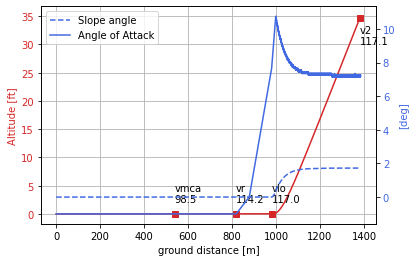

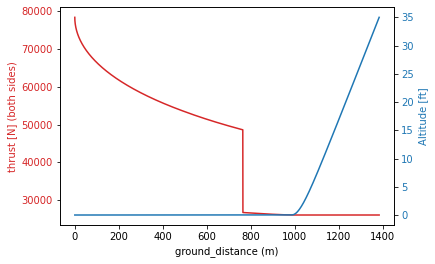

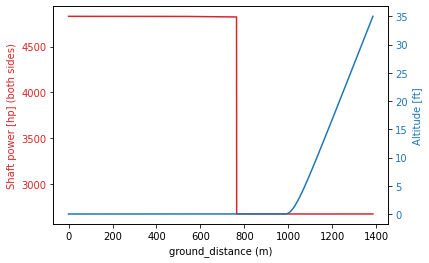

In [58]:
flight_data_to= pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'TO_flight_points.csv' ))
flight_data_to= flight_data_to[flight_data_to.name=="take off"]
vv = VariableViewer()
#vv.display()
vv.load(RESULT_FILE)
results=vv.get_variables()
V_1=results["data:mission:sizing:takeoff:V_1"].value
V_EF=results["data:mission:sizing:takeoff:V_EF"].value
V_2=results["data:mission:sizing:takeoff:V_2"].value
V_liftoff=results["data:mission:sizing:takeoff:V_liftoff"].value
V_rotate=results["data:mission:sizing:takeoff:V_rotate"].value
V_MCA=results["data:mission:sizing:takeoff:V_MCA"].value
TOFL=results["data:mission:sizing:takeoff:TOFL"].value
print('TOFL',round(TOFL),'m')
print('TODn-1',round(float(flight_data_to.ground_distance.values[-1])),'m', 'V_1',round(float(V_1),1),' V_EF',round(float(V_EF),1))

fp_v2 = flight_data_to[flight_data_to.true_airspeed<=V_2].iloc[-1]
fp_vlo = flight_data_to[flight_data_to.true_airspeed>=V_liftoff].iloc[0]
fp_vr = flight_data_to[flight_data_to.true_airspeed>=V_rotate].iloc[0]
fp_vmca = flight_data_to[flight_data_to.true_airspeed>=V_MCA].iloc[0]

color = 'tab:red'

fig, ax1 = plt.subplots()
plt.grid()
ax1.set_xlabel('ground distance [m]')
ax1.set_ylabel('Altitude [ft]', color=color)
ax1.plot(flight_data_to.ground_distance, flight_data_to.altitude/constants.foot,
          [fp_v2.ground_distance,fp_vlo.ground_distance,fp_vr.ground_distance,fp_vmca.ground_distance],
          [fp_v2.altitude/constants.foot,fp_vlo.altitude/constants.foot,fp_vr.altitude/constants.foot,fp_vmca.altitude/constants.foot],'bs',color=color)
ax1.text(fp_v2.ground_distance,fp_v2.altitude/constants.foot,'v2\n'+ str(round(V_2/constants.knot,1))).set_y(30)
ax1.text(fp_vlo.ground_distance,fp_vlo.altitude/constants.foot,'vlo\n'+ str(round(V_liftoff/constants.knot,1))).set_y(2)
ax1.text(fp_vr.ground_distance,fp_vr.altitude/constants.foot,'vr\n'+ str(round(V_rotate/constants.knot,1))).set_y(2)
ax1.text(fp_vmca.ground_distance,fp_vmca.altitude/constants.foot,'vmca\n'+ str(round(V_MCA/constants.knot,1))).set_y(2)

ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel('[deg]', color='royalblue')
ax2.plot(flight_data_to.ground_distance, flight_data_to.slope_angle/constants.degree,'--',color='royalblue',label='Slope angle')
ax2.plot(flight_data_to.ground_distance, flight_data_to.alpha/constants.degree,color='royalblue',label='Angle of Attack')
ax2.legend(loc='upper left')

plot_double(flight_data_to.ground_distance,flight_data_to.thrust,flight_data_to.altitude/constants.foot,'ground_distance (m)','thrust [N] (both sides)','Altitude [ft]')
plot_double(flight_data_to.ground_distance,flight_data_to.TPshaft_power/constants.hp,flight_data_to.altitude/constants.foot,'ground_distance (m)','Shaft power [hp] (both sides)','Altitude [ft]')
#plot_double(flight_data_to.time,flight_data_to.thrust,flight_data_to.altitude/constants.foot,'time (s)','thrust [N] (both sides)','Altitude [ft]')
#plot_double(flight_data_to.time,flight_data_to.alpha/constants.degree,flight_data_to.slope_angle/constants.degree,'time (s)','alpha [deg] ','gamma [deg]')
#plot_double(flight_data_to.ground_distance,flight_data_to.alpha/constants.degree,flight_data_to.altitude/constants.foot,'distance (m)','alpha [deg] ','gamma [deg]')


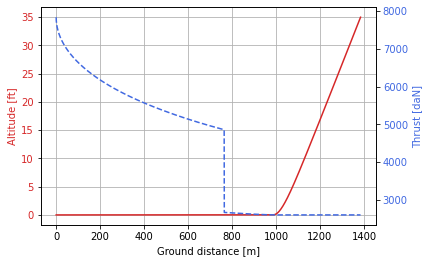

In [62]:

fig, ax1 = plt.subplots()
plt.grid()

ax1.set_xlabel('Ground distance [m]')
ax1.set_ylabel('Altitude [ft]', color='tab:red')
ax1.plot(flight_data_to.ground_distance, flight_data_to.altitude/constants.foot ,'-',color='tab:red')#,label='Altitude')
#ax1.plot(df[df.FL==20000].RTO, 785.9*np.ones(len(df[df.FL==20000].RTO.values)) ,'_-',color='red',label='ATR72_baseline')

#ax3=ax1.twinx()
#ax3.spines['right'].set_position(("axes", 1.2))
#ax3.tick_params(axis='y', labelcolor='red')
#ax3.set_ylim(2500,5000)
#ax3.set_ylabel('Shaft power [hp] (both sides)', color='red')
#ax3.plot(flight_data_to.ground_distance, flight_data_to.TPshaft_power/constants.hp  ,'--',color='red')#,label='FL180')

ax1.tick_params(axis='y', labelcolor='tab:red')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor='royalblue')

ax2.set_ylabel('Thrust [daN]', color='royalblue')
ax2.plot(flight_data_to.ground_distance, flight_data_to.thrust/10 ,'--',color='royalblue')#,label='FL180')

#ax2.legend(loc='upper right')



ASDn-1 1325 m


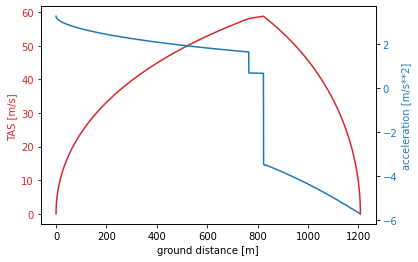

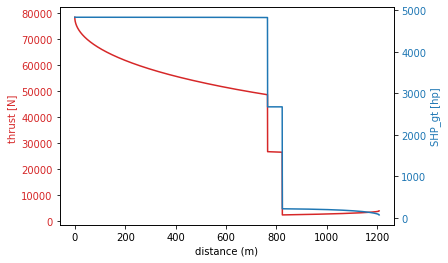

In [64]:
flight_data_to= pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'TO_flight_points.csv' ))
flight_data_to= flight_data_to[flight_data_to.name=="ASD"]

time_v1 = float(flight_data_to[flight_data_to.engine_setting == 8]['time'].iloc[0]+1)
flight_point_v1 = flight_data_to.loc[flight_data_to.time == time_v1]
ASD = flight_data_to.ground_distance.values[-1] + flight_point_v1.equivalent_airspeed*2  #+2sec at v1
print('ASDn-1',round(float(ASD)),'m')
plot_double(flight_data_to.ground_distance,flight_data_to.true_airspeed,flight_data_to.acceleration,'ground distance [m]','TAS [m/s] ','acceleration [m/s**2]')
plot_double(flight_data_to.ground_distance,flight_data_to.thrust,flight_data_to.TPshaft_power/constants.hp,'distance (m)','thrust [N] ','SHP_gt [hp]')



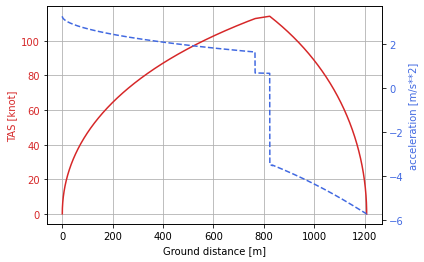

In [65]:

fig, ax1 = plt.subplots()
plt.grid()

ax1.set_xlabel('Ground distance [m]')
ax1.set_ylabel('TAS [knot]', color='tab:red')
ax1.plot(flight_data_to.ground_distance, flight_data_to.true_airspeed/constants.knot ,'-',color='tab:red')#,label='Altitude')
#ax1.plot(df[df.FL==20000].RTO, 785.9*np.ones(len(df[df.FL==20000].RTO.values)) ,'_-',color='red',label='ATR72_baseline')
#ax1.set_ylim(0,120)
'''ax3=ax1.twinx()
ax3.spines['right'].set_position(("axes", 1.2))
ax3.tick_params(axis='y', labelcolor='tab:red')
#ax3.set_ylim(0,5000)
ax3.set_ylabel('Shaft power [hp] (both sides)', color='tab:red')
ax3.plot(flight_data_to.ground_distance, flight_data_to.TPshaft_power/constants.hp  ,'--',color='tab:red')#,label='FL180')
'''
ax1.tick_params(axis='y', labelcolor='tab:red')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor='royalblue')

ax2.set_ylabel('acceleration [m/s**2]', color='royalblue')
ax2.plot(flight_data_to.ground_distance, flight_data_to.acceleration ,'--',color='royalblue')#,label='FL180')

#ax2.legend(loc='upper right')



### 1.1. OEI Climb

### 2. Climb

<div class="row">
  <div class="column">
    <img src="../img/ATR72/ATR_72_climb.png" width="1100">
  </div>
</div>



In [9]:

############# RHEA DOC RESULTS ##########

vv = VariableViewer()
#vv.display()
vv.load(RESULT_DOC_FILE)
#vv.load(RESULT_FILE)

results=vv.get_variables()
#TOW=results["data:mission:DOC:TOW"].value
TOW=results["data:weight:aircraft:MTOW"].value

FL=flight_data.altitude.max()
print(FL)
flight_data_in_climb = flight_data[flight_data.name=='initial climb']
Fuel_in_climb=flight_data_in_climb.fuel_mass.values[-1]
print('RHEA DOC Fuel initial climb',round(Fuel_in_climb,2),'kg')
print('RHEA DOC Time initial climb',round(flight_data_in_climb.time.values[-1]/60-flight_data_in_climb.time.values[0]/60,2),'min'
     )

flight_data_climb = flight_data[flight_data.name=='climb']
#remove the points of climb that are actually cruise (acceleration to cruise mach)
flight_data_climb = flight_data_climb[flight_data_climb.time<=flight_data.loc[flight_data['altitude']==FL, ['time']].values[0][0]]

print('RHEA DOC TOW',int(TOW), 'kg')
TTC=flight_data_climb.time.values[-1]-flight_data_in_climb.time.values[-1]
print('RHEA DOC TTC',round(TTC/60,2), 'min')

Fuel_climb= flight_data_climb[flight_data_climb.name=='climb'].fuel_mass.values[-1]-flight_data_in_climb.fuel_mass.values[-1]
print('RHEA DOC Fuel climb',round(Fuel_climb,2),'kg')


6095.999999999997
RHEA DOC Fuel initial climb 29.91 kg
RHEA DOC Time initial climb 1.37 min
RHEA DOC TOW 23572 kg
RHEA DOC TTC 16.89 min
RHEA DOC Fuel climb 256.53 kg


In [ ]:
plot_double(flight_data_in_climb.time/60,flight_data_in_climb.TPshaft_power/1000,flight_data_in_climb.altitude/constants.foot,'time (min)','Shaft power [kW] (both sides)','Altitude [ft]')
plot_double(flight_data_in_climb.time/60,flight_data_in_climb.psfc*constants.hour*constants.hp,flight_data_in_climb.TP_power_rate,'time (min)','PSFC [kg/hr/hp]','Throttle [-]')
plot_double(flight_data_in_climb.time.values/60,flight_data_in_climb.equivalent_airspeed.values/constants.knot, flight_data_in_climb.altitude.values/constants.foot,'time (min)','EAS [knots]','Altitude [ft]')


In [ ]:
plot_double(flight_data_climb.time/60,flight_data_climb.mass,flight_data_climb.altitude,'time (min)','mass','Altitude [m]')
plot_double(flight_data_climb.time/60,flight_data_climb.TPshaft_power/1000,flight_data_climb.altitude,'time (min)','Shaft power [kW] (both sides)','Altitude [m]')
plot_double(flight_data_climb.time/60,flight_data_climb.psfc*constants.hour*constants.hp,flight_data_climb.TP_power_rate,'time (min)','PSFC [kg/hr/hp]','Throttle [-]')
plot_double(flight_data_climb.time.values/60,flight_data_climb.equivalent_airspeed.values/constants.knot, flight_data_climb.altitude.values/constants.foot,'time (min)','EAS [knots]','Altitude [ft]')
plot_double(flight_data_climb.ground_distance/constants.nautical_mile,flight_data_climb.TPshaft_power/1000,flight_data_climb.altitude,'time (min)','Shaft power [kW] (both sides)','Altitude [m]')
plot_double(flight_data_climb.time/60,flight_data_climb.thrust/10,flight_data_climb.altitude/constants.foot,'time (min)','Thrust [daN] ','Altitude [ft]')

eta_prop=  (flight_data_climb.thrust-flight_data_climb.TP_residual_thrust)*flight_data_climb.true_airspeed/(flight_data_climb.TPshaft_power*0.99)
plot_double(flight_data_climb.time/60,flight_data_climb.thrust/10,np.around(eta_prop.values,2),'time (min)','Thrust [daN] ','eta_prop [-]')
RC= flight_data_climb.true_airspeed[:-1]*np.sin(flight_data_climb.slope_angle[:-1])
plot_double(flight_data_climb.ground_distance[:-1]/constants.nautical_mile,RC*60/constants.foot,flight_data_climb.slope_angle[:-1]/constants.degree,'Ground distance (nm)','Rate of climb [ft/min]','Slope angle [°]')
RC.values[-1]*60/constants.foot


### 3. Cruise

<div class="row">
  <div class="column">
    <img src="../img/ATR72/ATR_72_cruise_SR.png" width="900">
  </div>
</div>




In [ ]:
############# RHEA RESULTS ##########
flight_data_cruise=flight_data[flight_data.altitude==FL]
max_mach_rhea=flight_data_cruise.mach.values[-1]
cruise_fuel=(flight_data_cruise.fuel_mass.values[-1]-flight_data_climb.fuel_mass.values[-1])
cruise_distance=(flight_data_cruise.ground_distance.values[-1]-flight_data_climb.ground_distance.values[-1])
max_SR_rhea = cruise_distance/constants.nautical_mile/cruise_fuel
print('RHEA specific range at',round(FL/constants.foot),'ft','@',round(TOW),'TOW', 'is',round(max_SR_rhea,3),'nm/kg','@',round(max_mach_rhea,3),'mach',round(flight_data_cruise.true_airspeed.values[-1]/constants.knot),'kt')
print('RHEA cruise fuel consumption',round(cruise_fuel,2),'kg','cruise distance',round(cruise_distance/constants.nautical_mile,2),'nm')
print(flight_data[flight_data.name=='cruise'].thrust.values[0]/20)
print(flight_data[flight_data.name=='cruise'].TPshaft_power.values[0]/constants.hp/2)
print(flight_data[flight_data.name=='cruise'].mass.values[0])
print(flight_data[flight_data.name=='cruise'].time.values[0]-flight_data_cruise.time.values[0])
283/60

In [ ]:
plot_double(flight_data_cruise.time/60,flight_data_cruise.TPshaft_power/1000,flight_data_cruise.altitude,'time (min)','Shaft power [kW] (both sides)','Altitude [m]')
plot_double(flight_data_cruise.time/60,flight_data_cruise.thrust/10,flight_data_cruise.altitude,'time (min)','Thrust [daN] ','Altitude [m]')
plot_double(flight_data_cruise.time/60,flight_data_cruise.true_airspeed/constants.knot,round(flight_data_cruise.TP_power_rate),'time (min)','V_TAS [knot] ','Throttle [-]')
eta_prop=  flight_data_cruise.thrust*flight_data_cruise.true_airspeed/(flight_data_cruise.TPshaft_power*0.99)
plot_double(flight_data_cruise.time/60,flight_data_cruise.thrust/10,eta_prop,'time (min)','Thrust [daN] ','eta_prop [-]')
plot_double(flight_data_cruise.time/60,flight_data_cruise.equivalent_airspeed/constants.knot,round(flight_data_cruise.TP_power_rate),'time (min)','V_TAS [knot] ','Throttle [-]')


### 4. Descent

In [ ]:
############# RHEA RESULTS ##########
flight_data_descent = flight_data[(flight_data['name']=='descent') | (flight_data['name']=='acceleration descent')]
descent_speed=flight_data_descent.equivalent_airspeed.values[-2]/constants.knot
descent_fuel=flight_data_descent.fuel_mass.values[-2]-flight_data_cruise.fuel_mass.values[-1]

print('RHEA fuel consumption in descent from',FL/constants.foot,'ft', 'at',round(descent_speed,0),' knots is ',round(descent_fuel,2),'kg')
ff=flight_data_descent.psfc.values[:-1] * flight_data_descent.TPshaft_power.values[:-1]/2 #kg/s
descent_time = flight_data_descent.time.values[-1]/60-flight_data_cruise.time.values[-1]/60
print('Descent time',round(descent_time,1),'min')



In [ ]:
plot_double(flight_data_descent.time.values[:-1]/60-flight_data_descent.time.values[0]/60,flight_data_descent.equivalent_airspeed.values[:-1]/constants.knot,flight_data_descent.altitude.values[:-1]/constants.foot,'time (min)','EAS [knots]','Altitude [ft]')
RD= flight_data_descent.true_airspeed[:-1]*np.sin(flight_data_descent.slope_angle[:-1])
plot_double(flight_data_descent.ground_distance[:-1]/constants.nautical_mile,RD*60/constants.foot,flight_data_descent.slope_angle[:-1]/constants.degree,'Ground distance (nm)','Rate of descent [ft/min]','Slope angle [°]')
plot_double(flight_data_descent.time.values[:-1]/60-flight_data_descent.time.values[0]/60, flight_data_descent.altitude.values[:-1]/constants.foot,flight_data_descent.TP_power_rate[:-1],'time (min)','Altitude [ft]','Throttle [-]')
plot_double(flight_data_descent.time.values[:-1]/60-flight_data_descent.time.values[0]/60, flight_data_descent.altitude.values[:-1]/constants.foot,flight_data_descent.thrust[:-1],'time (min)','Altitude [ft]','Thrust [N]')
flight_data_descent.thrust.head()

### 5.  Block Fuel

In [ ]:
############# RHEA RESULTS ##########


vv = VariableViewer()
vv.load(RESULT_DOC_FILE)
#vv.display()
#vv.load(RESULT_DOC_FILE)
results=vv.get_variables()
TOW=results["data:mission:DOC:TOW"].value
BF_RHEA=results["data:mission:DOC:block_fuel"].value
range_RHEA=results["data:mission:DOC:range"].value
print('RHEA block fuel for',range_RHEA/constants.nautical_mile,'nm','IC is',round(BF_RHEA,1), 'kg')


### 6.  Reserves

In [ ]:
flight_data_div_climb=flight_data[flight_data.name=='diversion climb']
FL_div=flight_data_div_climb.altitude.max()
#remove the points of climb that are actually cruise (acceleration to cruise mach)
flight_data_div_climb = flight_data_div_climb[flight_data_div_climb.time<=flight_data.loc[flight_data['altitude']==FL_div, ['time']].values[0][0]]

print('DIVERSION CLIMB')
plot_double(flight_data_div_climb.time/60,flight_data_div_climb.TPshaft_power/1000,flight_data_div_climb.fuel_mass,'time (min)','Shaft power [kW] (both sides)','fuel_mass [kg]')
plot_double(flight_data_div_climb.time/60,flight_data_div_climb.equivalent_airspeed.values/constants.knot,flight_data_div_climb.fuel_mass,'time (min)','EAS [knots] ','fuel_mass [kg]')

flight_data_div_cruise= flight_data[flight_data.name=='diversion cruise']
flight_data_div_cruise_up=flight_data[flight_data.time>=flight_data_div_climb.time.values[-1]]
flight_data_div_cruise = flight_data_div_cruise_up[flight_data_div_cruise_up.time<=flight_data_div_cruise.time.values[-1]]
print('DIVERSION CRUISE')

plot_double(flight_data_div_cruise.time/60,flight_data_div_cruise.TPshaft_power/1000,flight_data_div_cruise.fuel_mass,'time (min)','Shaft power [kW] (both sides)','fuel_mass [kg]')
plot_double(flight_data_div_cruise.time/60,flight_data_div_cruise.true_airspeed.values/constants.knot,flight_data_div_cruise.fuel_mass,'time (min)','TAS [knots] ','fuel_mass [kg]')

flight_data_div_desc=flight_data[flight_data.name=='diversion descent']
print('DIVERSION DESCENT')

plot_double(flight_data_div_desc.time.values[:-1]/60,flight_data_div_desc.equivalent_airspeed.values[:-1]/constants.knot,flight_data_div_desc.fuel_mass.values[:-1],'time (min)','EAS [knots] ','fuel_mass [kg]')

print('HOLDING')
flight_data_hold=flight_data[flight_data.name=='holding']
plot_double(flight_data_hold.time/60,flight_data_hold.TPshaft_power/1000,flight_data_hold.fuel_mass,'time (min)','Shaft power [kW] (both sides)','fuel_mass [kg]')
plot_double(flight_data_hold.time/60,flight_data_hold.true_airspeed.values/constants.knot,flight_data_hold.mach,'time (min)','TAS [knots]','Mach')
plot_double(flight_data_hold.time/60,flight_data_hold.equivalent_airspeed.values/constants.knot,flight_data_hold.mach,'time (min)','EAS [knots]','Mach')
